<a href="https://colab.research.google.com/github/Sanim27/Mnist_Lin/blob/main/Mnist_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [ ]:
dataset=MNIST(root='data/',download=True)

In [ ]:
len(dataset)

60000

In [ ]:
test_dataset=MNIST(root='data/',train=False)
len(test_dataset)

10000

In [ ]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 1


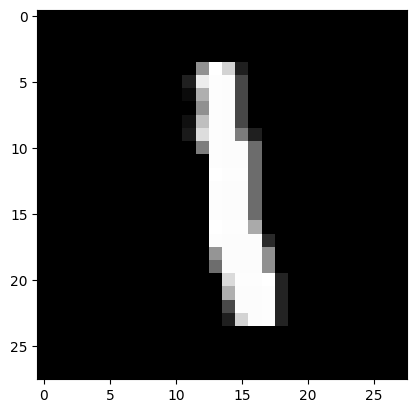

In [ ]:
image,label=dataset[6]
plt.imshow(image,cmap='gray')
print('Label:',label)
plt.show()

In [ ]:
import torchvision.transforms as transforms

In [ ]:
dataset=MNIST(root='data/',train=True,transform=transforms.ToTensor())

In [ ]:
img_tensor,label=dataset[0]

In [ ]:
img_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
print(img_tensor[0,10:15,10:15])

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])


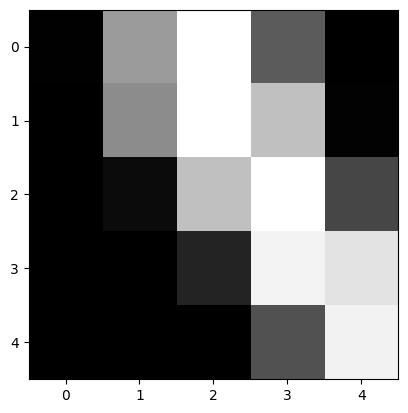

In [ ]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [ ]:
from torch.utils.data import random_split
train_ds,val_ds=random_split(dataset,[50000,10000])
len(train_ds),len(val_ds)

(50000, 10000)

In [ ]:
from torch.utils.data import DataLoader

batch_size=128
train_loader=DataLoader(train_ds,batch_size,shuffle=True)
val_loader=DataLoader(val_ds,batch_size)

In [ ]:
import torch.nn as nn
input_size=28*28
num_classes=10
model=nn.Linear(input_size,num_classes)

In [ ]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 1.4877e-02, -2.8841e-02,  3.4600e-02,  ..., -2.2403e-02,
          2.1631e-02, -2.1466e-02],
        [-1.7178e-02,  8.5878e-05, -1.2174e-03,  ..., -1.2035e-02,
          3.3462e-02, -3.2409e-03],
        [ 5.4730e-03, -1.3535e-02,  7.0411e-03,  ..., -3.4226e-03,
         -3.2912e-02, -1.6204e-02],
        ...,
        [-1.1833e-02, -2.5449e-02, -2.9141e-02,  ..., -1.3852e-02,
         -2.7031e-02, -2.9387e-02],
        [-2.3558e-02,  5.3537e-03, -2.0176e-02,  ...,  1.3617e-02,
         -3.3686e-02, -2.7643e-02],
        [-4.5001e-03, -3.1500e-02, -3.3802e-02,  ..., -2.3084e-02,
         -2.4297e-02, -2.6860e-02]], requires_grad=True)

In [ ]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(input_size,num_classes)
  def forward(self,xb):
    xb=xb.reshape(-1,784)
    out=self.linear(xb)
    return out
model=MnistModel()

In [ ]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [ ]:
print(model.linear.weight.shape,model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0015, -0.0144,  0.0021,  ..., -0.0290,  0.0142,  0.0052],
         [ 0.0340,  0.0170,  0.0019,  ...,  0.0244, -0.0233, -0.0355],
         [-0.0301,  0.0321,  0.0254,  ...,  0.0166,  0.0321, -0.0241],
         ...,
         [-0.0308,  0.0161, -0.0159,  ...,  0.0059, -0.0110, -0.0303],
         [-0.0191,  0.0186, -0.0121,  ..., -0.0298,  0.0086,  0.0108],
         [-0.0233,  0.0193,  0.0192,  ...,  0.0134,  0.0137,  0.0179]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0008, -0.0153,  0.0309, -0.0224, -0.0178, -0.0183,  0.0148, -0.0129,
          0.0153, -0.0343], requires_grad=True)]

In [ ]:
for images,labels in train_loader:
  print(images.shape)
  outputs=model(images)
  break
print(outputs.shape)
print('sample output \n',outputs[:2].data)

torch.Size([128, 1, 28, 28])
torch.Size([128, 10])
sample output 
 tensor([[-0.1993,  0.0392,  0.1821,  0.1072, -0.0464,  0.1460, -0.2108,  0.0157,
          0.0099, -0.0632],
        [-0.0955, -0.0201,  0.2177,  0.0411, -0.0362,  0.4231, -0.1321,  0.2121,
         -0.3106,  0.3875]])


In [ ]:
import torch.nn.functional as F

In [ ]:
outputs[:2]

tensor([[-0.1993,  0.0392,  0.1821,  0.1072, -0.0464,  0.1460, -0.2108,  0.0157,
          0.0099, -0.0632],
        [-0.0955, -0.0201,  0.2177,  0.0411, -0.0362,  0.4231, -0.1321,  0.2121,
         -0.3106,  0.3875]], grad_fn=<SliceBackward0>)

In [ ]:
probs=F.softmax(outputs,dim=1)
print("Sample probabilities",probs[:2].data)

Sample probabilities tensor([[0.0815, 0.1034, 0.1193, 0.1107, 0.0949, 0.1150, 0.0805, 0.1010, 0.1004,
         0.0933],
        [0.0827, 0.0892, 0.1132, 0.0949, 0.0878, 0.1390, 0.0798, 0.1126, 0.0667,
         0.1341]])


In [ ]:
print('Sum across a row is',torch.sum(probs[0]).item())

Sum across a row is 1.0


In [ ]:
max_prob, preds=torch.max(probs,dim=1)

In [ ]:
print(max_prob)
print(preds)

tensor([0.1193, 0.1390, 0.1312, 0.1165, 0.1316, 0.1554, 0.1326, 0.1466, 0.1307,
        0.1215, 0.1341, 0.1308, 0.1282, 0.1542, 0.1199, 0.1258, 0.1271, 0.1139,
        0.1504, 0.1271, 0.1303, 0.1180, 0.1182, 0.1378, 0.1214, 0.1356, 0.1332,
        0.1197, 0.1322, 0.1332, 0.1483, 0.1280, 0.1251, 0.1318, 0.1171, 0.1266,
        0.1403, 0.1314, 0.1330, 0.1202, 0.1229, 0.1294, 0.1240, 0.1134, 0.1440,
        0.1267, 0.1369, 0.1347, 0.1311, 0.1226, 0.1231, 0.1344, 0.1306, 0.1385,
        0.1168, 0.1466, 0.1707, 0.1285, 0.1358, 0.1178, 0.1236, 0.1326, 0.1312,
        0.1249, 0.1298, 0.1276, 0.1291, 0.1253, 0.1239, 0.1515, 0.1261, 0.1233,
        0.1218, 0.1285, 0.1199, 0.1166, 0.1481, 0.1266, 0.1191, 0.1488, 0.1497,
        0.1304, 0.1220, 0.1192, 0.1427, 0.1388, 0.1310, 0.1312, 0.1212, 0.1267,
        0.1277, 0.1324, 0.1305, 0.1137, 0.1212, 0.1206, 0.1257, 0.1311, 0.1468,
        0.1400, 0.1205, 0.1259, 0.1247, 0.1485, 0.1176, 0.1295, 0.1585, 0.1195,
        0.1327, 0.1297, 0.1264, 0.1207, 

In [ ]:
labels

tensor([4, 8, 4, 4, 8, 8, 0, 2, 7, 4, 2, 8, 4, 8, 5, 2, 7, 5, 0, 2, 5, 9, 2, 7,
        2, 6, 7, 9, 1, 8, 6, 0, 9, 7, 5, 4, 6, 3, 0, 3, 3, 2, 6, 3, 0, 1, 7, 6,
        9, 7, 1, 0, 6, 0, 1, 2, 2, 9, 9, 7, 5, 6, 3, 9, 7, 4, 2, 4, 2, 7, 6, 7,
        1, 4, 3, 5, 1, 4, 9, 7, 2, 9, 9, 9, 7, 7, 6, 0, 1, 2, 9, 4, 1, 6, 3, 9,
        1, 0, 6, 0, 0, 1, 7, 0, 4, 7, 2, 1, 8, 2, 7, 9, 5, 1, 0, 3, 1, 2, 1, 2,
        7, 9, 1, 0, 2, 5, 9, 8])

In [ ]:
def accuracy(outputs,labels):
  _,preds=torch.max(outputs,dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [ ]:
print(torch.sum(preds==labels).item())

10


In [ ]:
preds==labels

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False,  True, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False,  True, False, False,
        False, False, False, False,  True, False, False, False])

In [ ]:
accuracy(outputs,labels)

tensor(0.0781)

In [ ]:
loss_fn=F.cross_entropy

In [ ]:
loss=loss_fn(outputs,labels)
print(loss)

tensor(2.3130, grad_fn=<NllLossBackward0>)


In [ ]:
def fit(epochs,lr,model,train_loader,val_loader,opt_func=torch.optim.SGD):
  optimizer=opt_func(model.parameters(),lr)
  history=[]

  for epoch in range(epochs):
    for batch in train_loader:
      loss=model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    result=evaluate(model,val_loader)
    model.epoch_end(epoch,result)
    history.append(result)
  return history

In [ ]:
def evaluate(model,val_loader):
  outputs=[model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

In [ ]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(input_size,num_classes)

  def forward(self,xb):
    xb=xb.reshape(-1,784)
    out=self.linear(xb)
    return out

  def training_step(self,batch):
    images,labels=batch
    out=self(images)        #generate outputs
    loss=F.cross_entropy(out,labels)    #loss
    return loss

  def validation_step(self,batch):
    images,labels=batch
    out=self(images)        #generate outputs
    loss=F.cross_entropy(out,labels)    #loss
    acc=accuracy(out,labels)
    return {'val_loss':loss,'val_acc':acc}

  def validation_epoch_end(self,outputs):
    batch_losses=[x["val_loss"] for x in outputs]
    epoch_loss=torch.stack(batch_losses).mean()
    batch_accs=[x["val_acc"] for x in outputs]
    epoch_acc=torch.stack(batch_accs).mean()
    return {'val_loss':epoch_loss.item(),'val_acc':epoch_acc.item()}


  def epoch_end(self,epoch,result):
    print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    print('--------------------------------------------------------------------------------------------------------------')

model=MnistModel()

In [ ]:
history1=fit(5,0.001,model,train_loader,val_loader)

Epoch [0], val_loss: 1.9497, val_acc: 0.6140
--------------------------------------------------------------------------------------------------------------
Epoch [1], val_loss: 1.6790, val_acc: 0.7267
--------------------------------------------------------------------------------------------------------------
Epoch [2], val_loss: 1.4760, val_acc: 0.7645
--------------------------------------------------------------------------------------------------------------
Epoch [3], val_loss: 1.3223, val_acc: 0.7875
--------------------------------------------------------------------------------------------------------------
Epoch [4], val_loss: 1.2039, val_acc: 0.8021
--------------------------------------------------------------------------------------------------------------


In [ ]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1109, val_acc: 0.8148
--------------------------------------------------------------------------------------------------------------
Epoch [1], val_loss: 1.0362, val_acc: 0.8249
--------------------------------------------------------------------------------------------------------------
Epoch [2], val_loss: 0.9752, val_acc: 0.8318
--------------------------------------------------------------------------------------------------------------
Epoch [3], val_loss: 0.9244, val_acc: 0.8356
--------------------------------------------------------------------------------------------------------------
Epoch [4], val_loss: 0.8815, val_acc: 0.8390
--------------------------------------------------------------------------------------------------------------


In [ ]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8447, val_acc: 0.8415
--------------------------------------------------------------------------------------------------------------
Epoch [1], val_loss: 0.8128, val_acc: 0.8440
--------------------------------------------------------------------------------------------------------------
Epoch [2], val_loss: 0.7850, val_acc: 0.8468
--------------------------------------------------------------------------------------------------------------
Epoch [3], val_loss: 0.7604, val_acc: 0.8493
--------------------------------------------------------------------------------------------------------------
Epoch [4], val_loss: 0.7385, val_acc: 0.8517
--------------------------------------------------------------------------------------------------------------


In [ ]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7189, val_acc: 0.8545
--------------------------------------------------------------------------------------------------------------
Epoch [1], val_loss: 0.7013, val_acc: 0.8556
--------------------------------------------------------------------------------------------------------------
Epoch [2], val_loss: 0.6852, val_acc: 0.8577
--------------------------------------------------------------------------------------------------------------
Epoch [3], val_loss: 0.6706, val_acc: 0.8587
--------------------------------------------------------------------------------------------------------------
Epoch [4], val_loss: 0.6573, val_acc: 0.8603
--------------------------------------------------------------------------------------------------------------


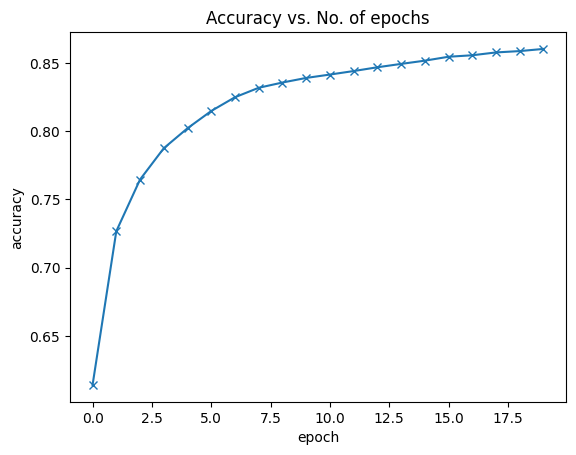

In [ ]:
history = history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

Since the code is ran multiple times ,couldnt track the increase in accuracy of the model

In [ ]:
test_dataset=MNIST(root='data/',train=False,transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


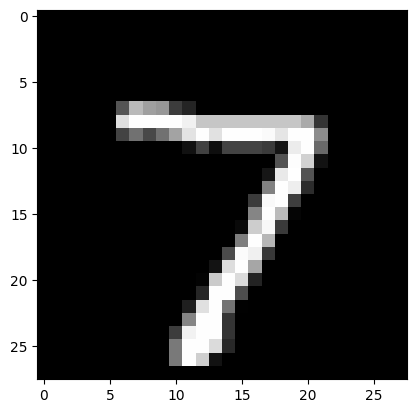

In [ ]:
img,label=test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('Shape:',img.shape)
print('Label:',label)

In [ ]:
def predict_image(img,model):
  xb=img.unsqueeze(0)
  yb=model(xb)
  _,preds=torch.max(yb,dim=1)
  return preds[0].item()

In [ ]:
predict_image(img[0],model)

7

Label: 0 , Predicted: 0


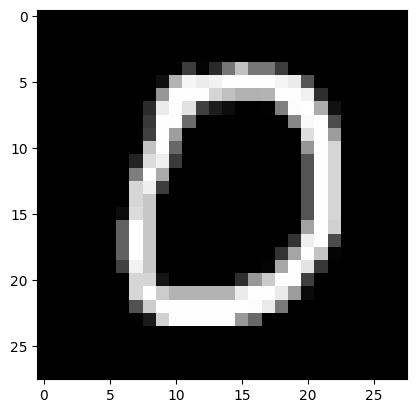

In [ ]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 6 , Predicted: 6


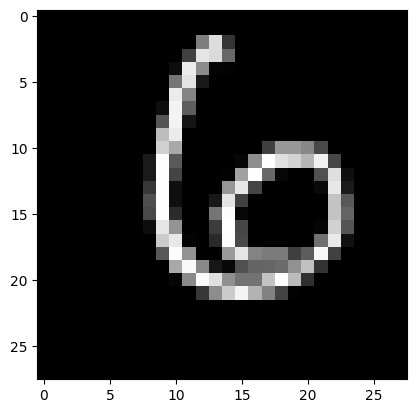

In [ ]:
img, label = test_dataset[100]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 7


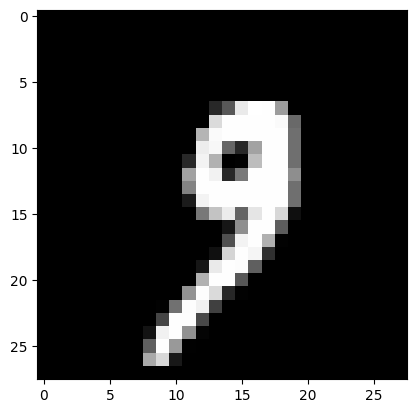

In [ ]:
img, label = test_dataset[1000]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


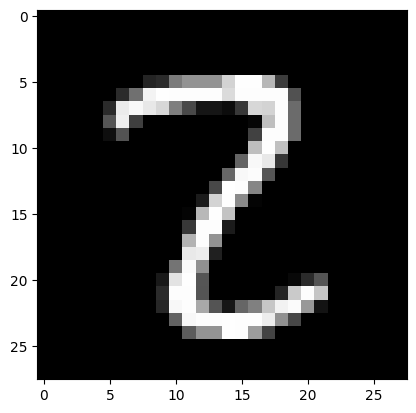

In [ ]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [ ]:
test_loader=DataLoader(test_dataset,batch_size=256)
result=evaluate(model,test_loader)
result

{'val_loss': 0.6398107409477234, 'val_acc': 0.861621081829071}

In [ ]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0073, -0.0102, -0.0280,  ..., -0.0138,  0.0100,  0.0266],
                      [ 0.0307, -0.0183, -0.0273,  ..., -0.0132,  0.0056,  0.0220],
                      [ 0.0023,  0.0160, -0.0059,  ..., -0.0053, -0.0011,  0.0014],
                      ...,
                      [ 0.0053,  0.0102,  0.0231,  ..., -0.0250, -0.0352, -0.0344],
                      [-0.0192, -0.0190,  0.0008,  ...,  0.0014, -0.0159, -0.0060],
                      [-0.0015,  0.0127, -0.0122,  ..., -0.0303, -0.0246, -0.0178]])),
             ('linear.bias',
              tensor([-0.0848,  0.1133, -0.0431, -0.0160,  0.0132,  0.0681, -0.0097,  0.0425,
                      -0.1211, -0.0117]))])

In [ ]:
model2=MnistModel()
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0331,  0.0081,  0.0022,  ...,  0.0045, -0.0264,  0.0204],
                      [-0.0316, -0.0247, -0.0298,  ..., -0.0007, -0.0311,  0.0036],
                      [-0.0232, -0.0256, -0.0085,  ..., -0.0295, -0.0014,  0.0241],
                      ...,
                      [-0.0270, -0.0038, -0.0130,  ...,  0.0181, -0.0041, -0.0320],
                      [-0.0003,  0.0027, -0.0247,  ...,  0.0067, -0.0083, -0.0259],
                      [-0.0127, -0.0267,  0.0255,  ...,  0.0013,  0.0217, -0.0108]])),
             ('linear.bias',
              tensor([-0.0233,  0.0074,  0.0158, -0.0055, -0.0278, -0.0259, -0.0325, -0.0145,
                       0.0279,  0.0057]))])

In [ ]:
evaluate(model2,test_loader)

{'val_loss': 2.305178165435791, 'val_acc': 0.09326171875}

In [ ]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0073, -0.0102, -0.0280,  ..., -0.0138,  0.0100,  0.0266],
                      [ 0.0307, -0.0183, -0.0273,  ..., -0.0132,  0.0056,  0.0220],
                      [ 0.0023,  0.0160, -0.0059,  ..., -0.0053, -0.0011,  0.0014],
                      ...,
                      [ 0.0053,  0.0102,  0.0231,  ..., -0.0250, -0.0352, -0.0344],
                      [-0.0192, -0.0190,  0.0008,  ...,  0.0014, -0.0159, -0.0060],
                      [-0.0015,  0.0127, -0.0122,  ..., -0.0303, -0.0246, -0.0178]])),
             ('linear.bias',
              tensor([-0.0848,  0.1133, -0.0431, -0.0160,  0.0132,  0.0681, -0.0097,  0.0425,
                      -0.1211, -0.0117]))])

In [ ]:
evaluate(model2,test_loader)

{'val_loss': 0.6398107409477234, 'val_acc': 0.861621081829071}